# Pre-processing Overlay data for WaDE upload.
- Purpose: To preprocess state overlay data into one main file for simple DataFrame creation and extraction.

In [1]:
# Needed Libraries / Modules

# ---- working with data ----
import os  # native operating system interaction
import numpy as np  # mathematical array manipulation
import pandas as pd  # data structure and data analysis
import geopandas as gpd  # geo-data structure and data analysis

# ---- visualization ----
import matplotlib.pyplot as plt  # plotting library
import seaborn as sns  # plotting library

# ---- API data retrieval ----
import requests  # http requests
import json  # JSON parse

# ---- Cleanup ----
import re  # string regular expression manipulation
from datetime import datetime  # date and time manipulation
pd.set_option('display.max_columns', 999)  # How to display all columns of a Pandas DataFrame in Jupyter Notebook
pd.set_option('display.float_format', lambda x: '%.5f' % x)  # suppress scientific notation in Pandas

In [2]:
# ---- working directory ----
workingDirString = "G:/Shared drives/WaDE Data/WaDE Data Folder/Kansas/Overlays" # set working directory folder string here
os.chdir(workingDirString)
print(f'The working Directory is:', workingDirString)

The working Directory is: G:/Shared drives/WaDE Data/WaDE Data Folder/Kansas/Overlays


## Overlay Area Data #1

In [3]:
# Input File
inputFile = "RawInputData/shapefiles/Groundwater_Management_Districts_GMD.zip"
dfin1 = gpd.read_file(inputFile).replace(np.nan, "")
dfin1['geometry'] = dfin1['geometry'].to_crs(epsg=4326) # Realign Geometry Projection

# WaDE UUID tracker for data assessment
if 'WaDEUUID' not in dfin1:
    dfin1['WaDEUUID'] = "ov" + dfin1.index.astype(str)
    dfin1.to_csv('RawInputData/Groundwater_Management_Districts_GMD.zip', compression=dict(method='zip', archive_name='Groundwater_Management_Districts_GMD.csv'), index=False)

print(len(dfin1))
dfin1.head()

5


,FID_1,OBJECTID,AREA,PERIMETER,GMD_,GMD_ID,NAME,SYM,SQ_MILES,Shape_Leng,Shape__Are,Shape__Len,Shape_Le_1,Shape_Area,geometry,WaDEUUID
0,1,1,3543390000.00000,392530,2,2,Equus Beds GMD #2,57,1722.23112,3.63570,7201619307.55000,451275.66048,3.63570,0.45786,"POLYGON ((-98.14225 38.17363, -98.03244 38.173...",ov0
1,2,2,4734380000.00000,472221,3,1,Western Kansas GMD #1,82,1848.31494,5.05914,7842759778.51000,607399.41803,5.05914,0.49481,"POLYGON ((-102.00184 38.91551, -101.98175 38.9...",ov1
2,3,3,12622400000.00000,626362,4,4,Northwest Kansas GMD #4,82,4927.36857,6.78553,21406688649.40000,815133.52864,6.78553,1.33455,"POLYGON ((-102.00040 39.87234, -101.27960 39.8...",ov2
3,4,4,10119400000.00000,587835,5,5,Big Bend GMD #5,82,3945.65810,6.12094,16485768101.40000,750525.77854,6.12094,1.04875,"POLYGON ((-98.47964 38.52199, -98.47954 38.304...",ov3
4,5,5,21604400000.00000,742771,6,3,Southwest Kansas GMD #3,57,8427.34647,7.74832,34815196392.00000,942909.90086,7.74832,2.22655,"POLYGON ((-101.07030 38.26464, -101.00045 38.2...",ov4


In [4]:
# create output for Regulatory Area #1 dataframe
df = pd.DataFrame()

# Data Assessment UUID
df['WaDEUUID'] = dfin1['WaDEUUID']

# Date Info
df['in_Date'] = "11/07/2024"
df['in_Year'] = "2024"

# Organization Info
df['in_OrganizationUUID'] = "KSov_O1"

# ReportingUnit Info
df['in_EPSGCodeCV'] = "4326"
df['in_ReportingUnitName'] = dfin1['NAME']
df['in_ReportingUnitNativeID'] = "ksGMD" + dfin1["GMD_ID"].astype(str)
df['in_ReportingUnitProductVersion'] = ""
df['in_ReportingUnitTypeCV'] = "Groundwater Management Districts"
df['in_ReportingUnitUpdateDate'] = ""
df['in_StateCV'] = "KS"
df['in_Geometry'] = dfin1['geometry']

# RegulatoryOverlay Info
df['in_OversightAgency'] = dfin1['NAME']
df['in_RegulatoryDescription'] = "In Kansas, local units of government, called groundwater management districts, provide water-use administration, planning, and information. Five groundwater management districts were created in the 1970s in the western and central parts of the state. The primary use of ground water in these areas is irrigation, although several districts also face issues of municipal supply. The districts are governed by local boards and have been instrumental in providing information and identifying research and regulatory needs within their boundaries."
df['in_RegulatoryName'] = dfin1['NAME']
df['in_RegulatoryOverlayNativeID'] = "ksGMD" + dfin1["GMD_ID"].astype(str)
df['in_RegulatoryStatusCV'] = "Final"
df['in_RegulatoryStatute'] = ""
df['in_RegulatoryStatuteLink'] ="https://www.kgs.ku.edu/Hydro/gmd.html"
df['in_StatutoryEffectiveDate'] = "9/25/2015"
df['in_StatutoryEndDate'] = ""
df['in_RegulatoryOverlayTypeCV'] = "Groundwater Management Districts"
df['in_WaterSourceTypeCV'] = "Groundwater"

df = df.drop_duplicates().reset_index(drop=True)
outdf1 = df.copy()
print(len(outdf1))
outdf1.head()

5


,WaDEUUID,in_Date,in_Year,in_OrganizationUUID,in_EPSGCodeCV,in_ReportingUnitName,in_ReportingUnitNativeID,in_ReportingUnitProductVersion,in_ReportingUnitTypeCV,in_ReportingUnitUpdateDate,in_StateCV,in_Geometry,in_OversightAgency,in_RegulatoryDescription,in_RegulatoryName,in_RegulatoryOverlayNativeID,in_RegulatoryStatusCV,in_RegulatoryStatute,in_RegulatoryStatuteLink,in_StatutoryEffectiveDate,in_StatutoryEndDate,in_RegulatoryOverlayTypeCV,in_WaterSourceTypeCV
0,ov0,11/07/2024,2024,KSov_O1,4326,Equus Beds GMD #2,ksGMD2,,Groundwater Management Districts,,KS,"POLYGON ((-98.14225 38.17363, -98.03244 38.173...",Equus Beds GMD #2,"In Kansas, local units of government, called g...",Equus Beds GMD #2,ksGMD2,Final,,https://www.kgs.ku.edu/Hydro/gmd.html,9/25/2015,,Groundwater Management Districts,Groundwater
1,ov1,11/07/2024,2024,KSov_O1,4326,Western Kansas GMD #1,ksGMD1,,Groundwater Management Districts,,KS,"POLYGON ((-102.00184 38.91551, -101.98175 38.9...",Western Kansas GMD #1,"In Kansas, local units of government, called g...",Western Kansas GMD #1,ksGMD1,Final,,https://www.kgs.ku.edu/Hydro/gmd.html,9/25/2015,,Groundwater Management Districts,Groundwater
2,ov2,11/07/2024,2024,KSov_O1,4326,Northwest Kansas GMD #4,ksGMD4,,Groundwater Management Districts,,KS,"POLYGON ((-102.00040 39.87234, -101.27960 39.8...",Northwest Kansas GMD #4,"In Kansas, local units of government, called g...",Northwest Kansas GMD #4,ksGMD4,Final,,https://www.kgs.ku.edu/Hydro/gmd.html,9/25/2015,,Groundwater Management Districts,Groundwater
3,ov3,11/07/2024,2024,KSov_O1,4326,Big Bend GMD #5,ksGMD5,,Groundwater Management Districts,,KS,"POLYGON ((-98.47964 38.52199, -98.47954 38.304...",Big Bend GMD #5,"In Kansas, local units of government, called g...",Big Bend GMD #5,ksGMD5,Final,,https://www.kgs.ku.edu/Hydro/gmd.html,9/25/2015,,Groundwater Management Districts,Groundwater
4,ov4,11/07/2024,2024,KSov_O1,4326,Southwest Kansas GMD #3,ksGMD3,,Groundwater Management Districts,,KS,"POLYGON ((-101.07030 38.26464, -101.00045 38.2...",Southwest Kansas GMD #3,"In Kansas, local units of government, called g...",Southwest Kansas GMD #3,ksGMD3,Final,,https://www.kgs.ku.edu/Hydro/gmd.html,9/25/2015,,Groundwater Management Districts,Groundwater


## Overlay Area #2

In [5]:
# etc etc,

## Concatenate DataFrames together

In [6]:
# Concatenate dataframes
frames = [outdf1] # list all out dataframes here
outdf = pd.concat(frames)
outdf = outdf.drop_duplicates().reset_index(drop=True).replace(np.nan, "")
print(len(outdf))

5


## Clean Data / data types

In [7]:
# Ensure Empty String / remove string value of "nan"

def ensureEmptyString(val):
    val = str(val).strip()
    if val == "" or val == " " or val == "nan" or pd.isnull(val):
        outString = ""
    else:
        outString = val
    return outString

In [8]:
outdf['in_ReportingUnitName'] = outdf.apply(lambda row: ensureEmptyString(row['in_ReportingUnitName']), axis=1)
outdf['in_ReportingUnitName'].unique()

array(['Equus Beds GMD #2', 'Western Kansas GMD #1',
       'Northwest Kansas GMD #4', 'Big Bend GMD #5',
       'Southwest Kansas GMD #3'], dtype=object)

In [9]:
outdf['in_RegulatoryDescription'] = outdf.apply(lambda row: ensureEmptyString(row['in_RegulatoryDescription']), axis=1)
outdf['in_RegulatoryDescription'].unique()

array(['In Kansas, local units of government, called groundwater management districts, provide water-use administration, planning, and information. Five groundwater management districts were created in the 1970s in the western and central parts of the state. The primary use of ground water in these areas is irrigation, although several districts also face issues of municipal supply. The districts are governed by local boards and have been instrumental in providing information and identifying research and regulatory needs within their boundaries.'],
      dtype=object)

In [10]:
outdf['in_RegulatoryName'] = outdf.apply(lambda row: ensureEmptyString(row['in_RegulatoryName']), axis=1)
outdf['in_RegulatoryName'].unique()

array(['Equus Beds GMD #2', 'Western Kansas GMD #1',
       'Northwest Kansas GMD #4', 'Big Bend GMD #5',
       'Southwest Kansas GMD #3'], dtype=object)

In [11]:
#Update datatype of StatutoryEffectiveDate to fit WaDE 2.0 structure
outdf['in_StatutoryEffectiveDate'] = pd.to_datetime(outdf['in_StatutoryEffectiveDate'], errors = 'coerce')
outdf['in_StatutoryEffectiveDate'] = pd.to_datetime(outdf['in_StatutoryEffectiveDate'].dt.strftime('%m/%d/%Y'))
outdf['in_StatutoryEffectiveDate'].unique()

<DatetimeArray>
['2015-09-25 00:00:00']
Length: 1, dtype: datetime64[ns]

# Geometry Data
- For attaching geometry to overlay reporting unit area info.

#### Overlay Area #1 shapefile info

In [12]:
# # Input File / or use same input as above
gdfin1 = outdf.copy()
gdfin1 = gpd.GeoDataFrame(gdfin1, geometry=gdfin1['in_Geometry'], crs="EPSG:4326") # covert to geodataframe
print(len(gdfin1))
gdfin1.head()

5


,WaDEUUID,in_Date,in_Year,in_OrganizationUUID,in_EPSGCodeCV,in_ReportingUnitName,in_ReportingUnitNativeID,in_ReportingUnitProductVersion,in_ReportingUnitTypeCV,in_ReportingUnitUpdateDate,in_StateCV,in_Geometry,in_OversightAgency,in_RegulatoryDescription,in_RegulatoryName,in_RegulatoryOverlayNativeID,in_RegulatoryStatusCV,in_RegulatoryStatute,in_RegulatoryStatuteLink,in_StatutoryEffectiveDate,in_StatutoryEndDate,in_RegulatoryOverlayTypeCV,in_WaterSourceTypeCV,geometry
0,ov0,11/07/2024,2024,KSov_O1,4326,Equus Beds GMD #2,ksGMD2,,Groundwater Management Districts,,KS,"POLYGON ((-98.14225 38.17363, -98.03244 38.173...",Equus Beds GMD #2,"In Kansas, local units of government, called g...",Equus Beds GMD #2,ksGMD2,Final,,https://www.kgs.ku.edu/Hydro/gmd.html,2015-09-25,,Groundwater Management Districts,Groundwater,"POLYGON ((-98.14225 38.17363, -98.03244 38.173..."
1,ov1,11/07/2024,2024,KSov_O1,4326,Western Kansas GMD #1,ksGMD1,,Groundwater Management Districts,,KS,"POLYGON ((-102.00184 38.91551, -101.98175 38.9...",Western Kansas GMD #1,"In Kansas, local units of government, called g...",Western Kansas GMD #1,ksGMD1,Final,,https://www.kgs.ku.edu/Hydro/gmd.html,2015-09-25,,Groundwater Management Districts,Groundwater,"POLYGON ((-102.00184 38.91551, -101.98175 38.9..."
2,ov2,11/07/2024,2024,KSov_O1,4326,Northwest Kansas GMD #4,ksGMD4,,Groundwater Management Districts,,KS,"POLYGON ((-102.00040 39.87234, -101.27960 39.8...",Northwest Kansas GMD #4,"In Kansas, local units of government, called g...",Northwest Kansas GMD #4,ksGMD4,Final,,https://www.kgs.ku.edu/Hydro/gmd.html,2015-09-25,,Groundwater Management Districts,Groundwater,"POLYGON ((-102.00040 39.87234, -101.27960 39.8..."
3,ov3,11/07/2024,2024,KSov_O1,4326,Big Bend GMD #5,ksGMD5,,Groundwater Management Districts,,KS,"POLYGON ((-98.47964 38.52199, -98.47954 38.304...",Big Bend GMD #5,"In Kansas, local units of government, called g...",Big Bend GMD #5,ksGMD5,Final,,https://www.kgs.ku.edu/Hydro/gmd.html,2015-09-25,,Groundwater Management Districts,Groundwater,"POLYGON ((-98.47964 38.52199, -98.47954 38.304..."
4,ov4,11/07/2024,2024,KSov_O1,4326,Southwest Kansas GMD #3,ksGMD3,,Groundwater Management Districts,,KS,"POLYGON ((-101.07030 38.26464, -101.00045 38.2...",Southwest Kansas GMD #3,"In Kansas, local units of government, called g...",Southwest Kansas GMD #3,ksGMD3,Final,,https://www.kgs.ku.edu/Hydro/gmd.html,2015-09-25,,Groundwater Management Districts,Groundwater,"POLYGON ((-101.07030 38.26464, -101.00045 38.2..."


<Axes: >

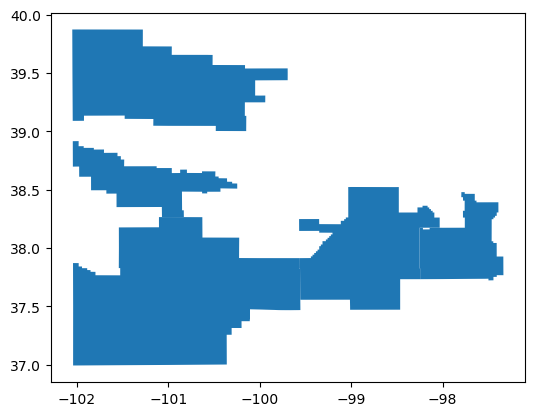

In [13]:
# plot shape info to map
gdfin1.plot()

In [14]:
# create output for Regulatory Area #1 dataframe
df = pd.DataFrame()

columnsList = ['in_ReportingUnitNativeID', 'geometry']
goutdf1 = pd.DataFrame(columns=columnsList, index=gdfin1.index)

goutdf1['in_ReportingUnitNativeID'] =  gdfin1["in_ReportingUnitNativeID"].astype(str)  # in_ReportingUnitNativeID needs to match source from above equivlaent datframe
goutdf1['geometry'] = gdfin1['geometry']
goutdf1 = goutdf1.drop_duplicates().reset_index(drop=True)
print(len(goutdf1))
goutdf1.head()

5


,in_ReportingUnitNativeID,geometry
0,ksGMD2,"POLYGON ((-98.14225 38.17363, -98.03244 38.173..."
1,ksGMD1,"POLYGON ((-102.00184 38.91551, -101.98175 38.9..."
2,ksGMD4,"POLYGON ((-102.00040 39.87234, -101.27960 39.8..."
3,ksGMD5,"POLYGON ((-98.47964 38.52199, -98.47954 38.304..."
4,ksGMD3,"POLYGON ((-101.07030 38.26464, -101.00045 38.2..."


#### Overlay Area #2 shapefile info

In [15]:
# etc etc...

#### Concatenate goutdf shapefile info into single output

In [16]:
# Concatenate Basin & Subbasin DataFrames
frames = [goutdf1] # add geoutdf dataframes here
goutdf = pd.concat(frames).reset_index(drop=True)

print(len(goutdf))
goutdf.head()

5


,in_ReportingUnitNativeID,geometry
0,ksGMD2,"POLYGON ((-98.14225 38.17363, -98.03244 38.173..."
1,ksGMD1,"POLYGON ((-102.00184 38.91551, -101.98175 38.9..."
2,ksGMD4,"POLYGON ((-102.00040 39.87234, -101.27960 39.8..."
3,ksGMD5,"POLYGON ((-98.47964 38.52199, -98.47954 38.304..."
4,ksGMD3,"POLYGON ((-101.07030 38.26464, -101.00045 38.2..."


## Export Data

In [17]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(outdf.dtypes)

WaDEUUID                                  object
in_Date                                   object
in_Year                                   object
in_OrganizationUUID                       object
in_EPSGCodeCV                             object
in_ReportingUnitName                      object
in_ReportingUnitNativeID                  object
in_ReportingUnitProductVersion            object
in_ReportingUnitTypeCV                    object
in_ReportingUnitUpdateDate                object
in_StateCV                                object
in_Geometry                             geometry
in_OversightAgency                        object
in_RegulatoryDescription                  object
in_RegulatoryName                         object
in_RegulatoryOverlayNativeID              object
in_RegulatoryStatusCV                     object
in_RegulatoryStatute                      object
in_RegulatoryStatuteLink                  object
in_StatutoryEffectiveDate         datetime64[ns]
in_StatutoryEndDate 

In [18]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(goutdf.dtypes)

in_ReportingUnitNativeID      object
geometry                    geometry
dtype: object


In [19]:
# Export out to CSV.
outdf.to_csv('RawInputData/Pov_Main.zip', compression=dict(method='zip', archive_name='Pov_Main.csv'), index=False)  # The output, save as a zip
goutdf.to_csv('RawInputData/P_Geometry.zip', compression=dict(method='zip', archive_name='P_Geometry.csv'), index=False)  # The output geometry.